In [58]:
%reload_ext autoreload
%matplotlib inline

In [5]:
%autoreload 2

import sys,os,glob
import psutil

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pprint import pprint
import datetime as dt


from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

import datetime as dt
import re
import gc
import matplotlib.animation as animation
import warnings
import pickle
from scipy.interpolate import interp1d


#-- Own settings

from settings import *

## current script object
thismodule = sys.modules[__name__]
workdir = os.getcwd()
# Add own module library to path
moduledir, fcndir = defineDir(workdir)

# load own libraries
from conditionalstats import *
from conditionalstats_chunked import *
from plot1D import *

# own DYAMOND functions
from fcns_load_DYAMOND_SAM import *
# own TOOCAN functions
from load_TOOCAN_DYAMOND_modif_BF import load_TOOCAN_DYAMOND

Own modules available: ['casestudy', 'conditionalstats', 'conditionalstats_chunked', 'plot1D', 'plot2D', 'plotCondPDFs', 'lifecycle_mapping']
Own modules available: ['load_TOOCAN_DYAMOND_modif', 'load_TOOCAN_DYAMOND', 'load_TOOCAN_DYAMOND_modif_BF', 'fcns_load_RCEMIP_SAM', 'fcns_multiscale_extremes', 'PrecipGrid', 'fcns_load_DYAMOND_SAM', 'fcns_movie']


In [6]:
path = '/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking'

In [7]:
filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'

In [8]:
toocan = load_TOOCAN_DYAMOND(os.path.join(path,filename))

/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160801-20160831.dat.gz


In [13]:
toocan[0]

< MCS_IntParameters object:
 . label: 1
 . qc_MCS: 11100
 . duration: 12.5
 . classif: 2
 . Tmax: 0.0
 . Utime_Init: 17014.18
 . lonInit: 115.04
 . latInit: 20.71
 . Utime_End: 17014.42
 . lonEnd: 116.37
 . latEnd: 21.88
 . lonmin: 114.93
 . latmin: 20.71
 . lonmax: 116.37
 . latmax: 21.89
 . vavg: 4.2
 . dist: 189.2
 . olrmin: 188.0
 . surfmaxPix_172Wm2: 0
 . surfmaxkm2_172Wm2: 32864.0
 . surfmaxkm2_132Wm2: 32592.0
 . surfmaxkm2_110Wm2: 32320.0
 . surfmaxkm2_90Wm2: 31520.0
 . surfcumkm2_172Wm2: 354480.0
 . surfcumkm2_132Wm2: 0
 . surfcumkm2_110Wm2: 0
 . surfcumkm2_90Wm2: 0
 . precip_total: 0
 . precip_max: 0
 . maxSurf00mmh_km2: 0
 . maxSurf02mmh_km2: 0
 . maxSurf05mmh_km2: 0
 . maxSurf10mmh_km2: 0
 . classif_JIRAK: 0.0
 . localtime_Init: 17014.6737
 . localtime_End: 17015.1774
 . clusters: <class 'load_TOOCAN_DYAMOND_modif_BF.MCS_Lifecycle'>
 >

In [14]:
N_mcs = len(toocan)
print(N_mcs,'TOOCAN objects')

276179 TOOCAN objects


In [15]:
date_ref = dt.datetime(year=1970,month=1,day=1)
times_init = np.array([date_ref+dt.timedelta(days=toocan[i_mcs].Utime_Init) for i_mcs in range(N_mcs)])

In [21]:
times_init

array([datetime.datetime(2016, 8, 1, 4, 19, 12),
       datetime.datetime(2016, 8, 1, 8, 52, 48),
       datetime.datetime(2016, 8, 1, 0, 43, 12), ...,
       datetime.datetime(2016, 8, 31, 11, 16, 48),
       datetime.datetime(2016, 8, 31, 10, 48),
       datetime.datetime(2016, 8, 31, 11, 31, 12)], dtype=object)

In [17]:
# Tmax

In [18]:
Tmax = np.array([toocan[i_mcs].Tmax for i_mcs in range(N_mcs)])
np.unique(Tmax)

array([0.])

In [19]:
plt.plot(toocan[0].clusters.Utime,toocan[0].clusters.surfkm2_132Wm2)

In [20]:
toocan[0].clusters.Utime[0], toocan[0].clusters.Utime[-1]

(17014.18, 17014.42)

# Show lifecycle

In [45]:
from datetime import timedelta
import pandas as pd

In [67]:
def timeIndex2Timedelta(i_MCS,j_t_MCS):

    date_str = toocan[i_MCS].clusters.Utime[j_t_MCS]
    date_day = int(date_str)
    date_30mn = int((str(date_str).split('.')[-1]).ljust(2,'0')) #ljust
    # compute time delta
    td = timedelta(days = int(date_str),seconds = date_30mn*30*60)

    # return
    return td

def timeStamp(i_MCS,j_t_MCS):
    
    # Create a datetime64 timestamp
    timestamp = np.datetime64('1970-01-01T00:00:00')

    # compute the timedelta
    delta = timeIndex2Timedelta(i_MCS,j_t_MCS)

    # Add the timedelta to the timestamp
    new_timestamp = timestamp + np.timedelta64(delta)

    return new_timestamp
    
def allTimes(i_MCS):
    
    N_t = len(toocan[i_MCS].clusters.Utime)
    
    time = []
    for j_t_MCS in range(N_t):
        
        time.append(timeStamp(i_MCS,j_t_MCS))
    
    return np.array(time)

def showLifeCycle(ax,i_MCS):
    
    time = allTimes(i_MCS)
    area = toocan[i_MCS].clusters.surfkm2_172Wm2
    
    ax.plot(time,area)

In [65]:
len(toocan)

276179

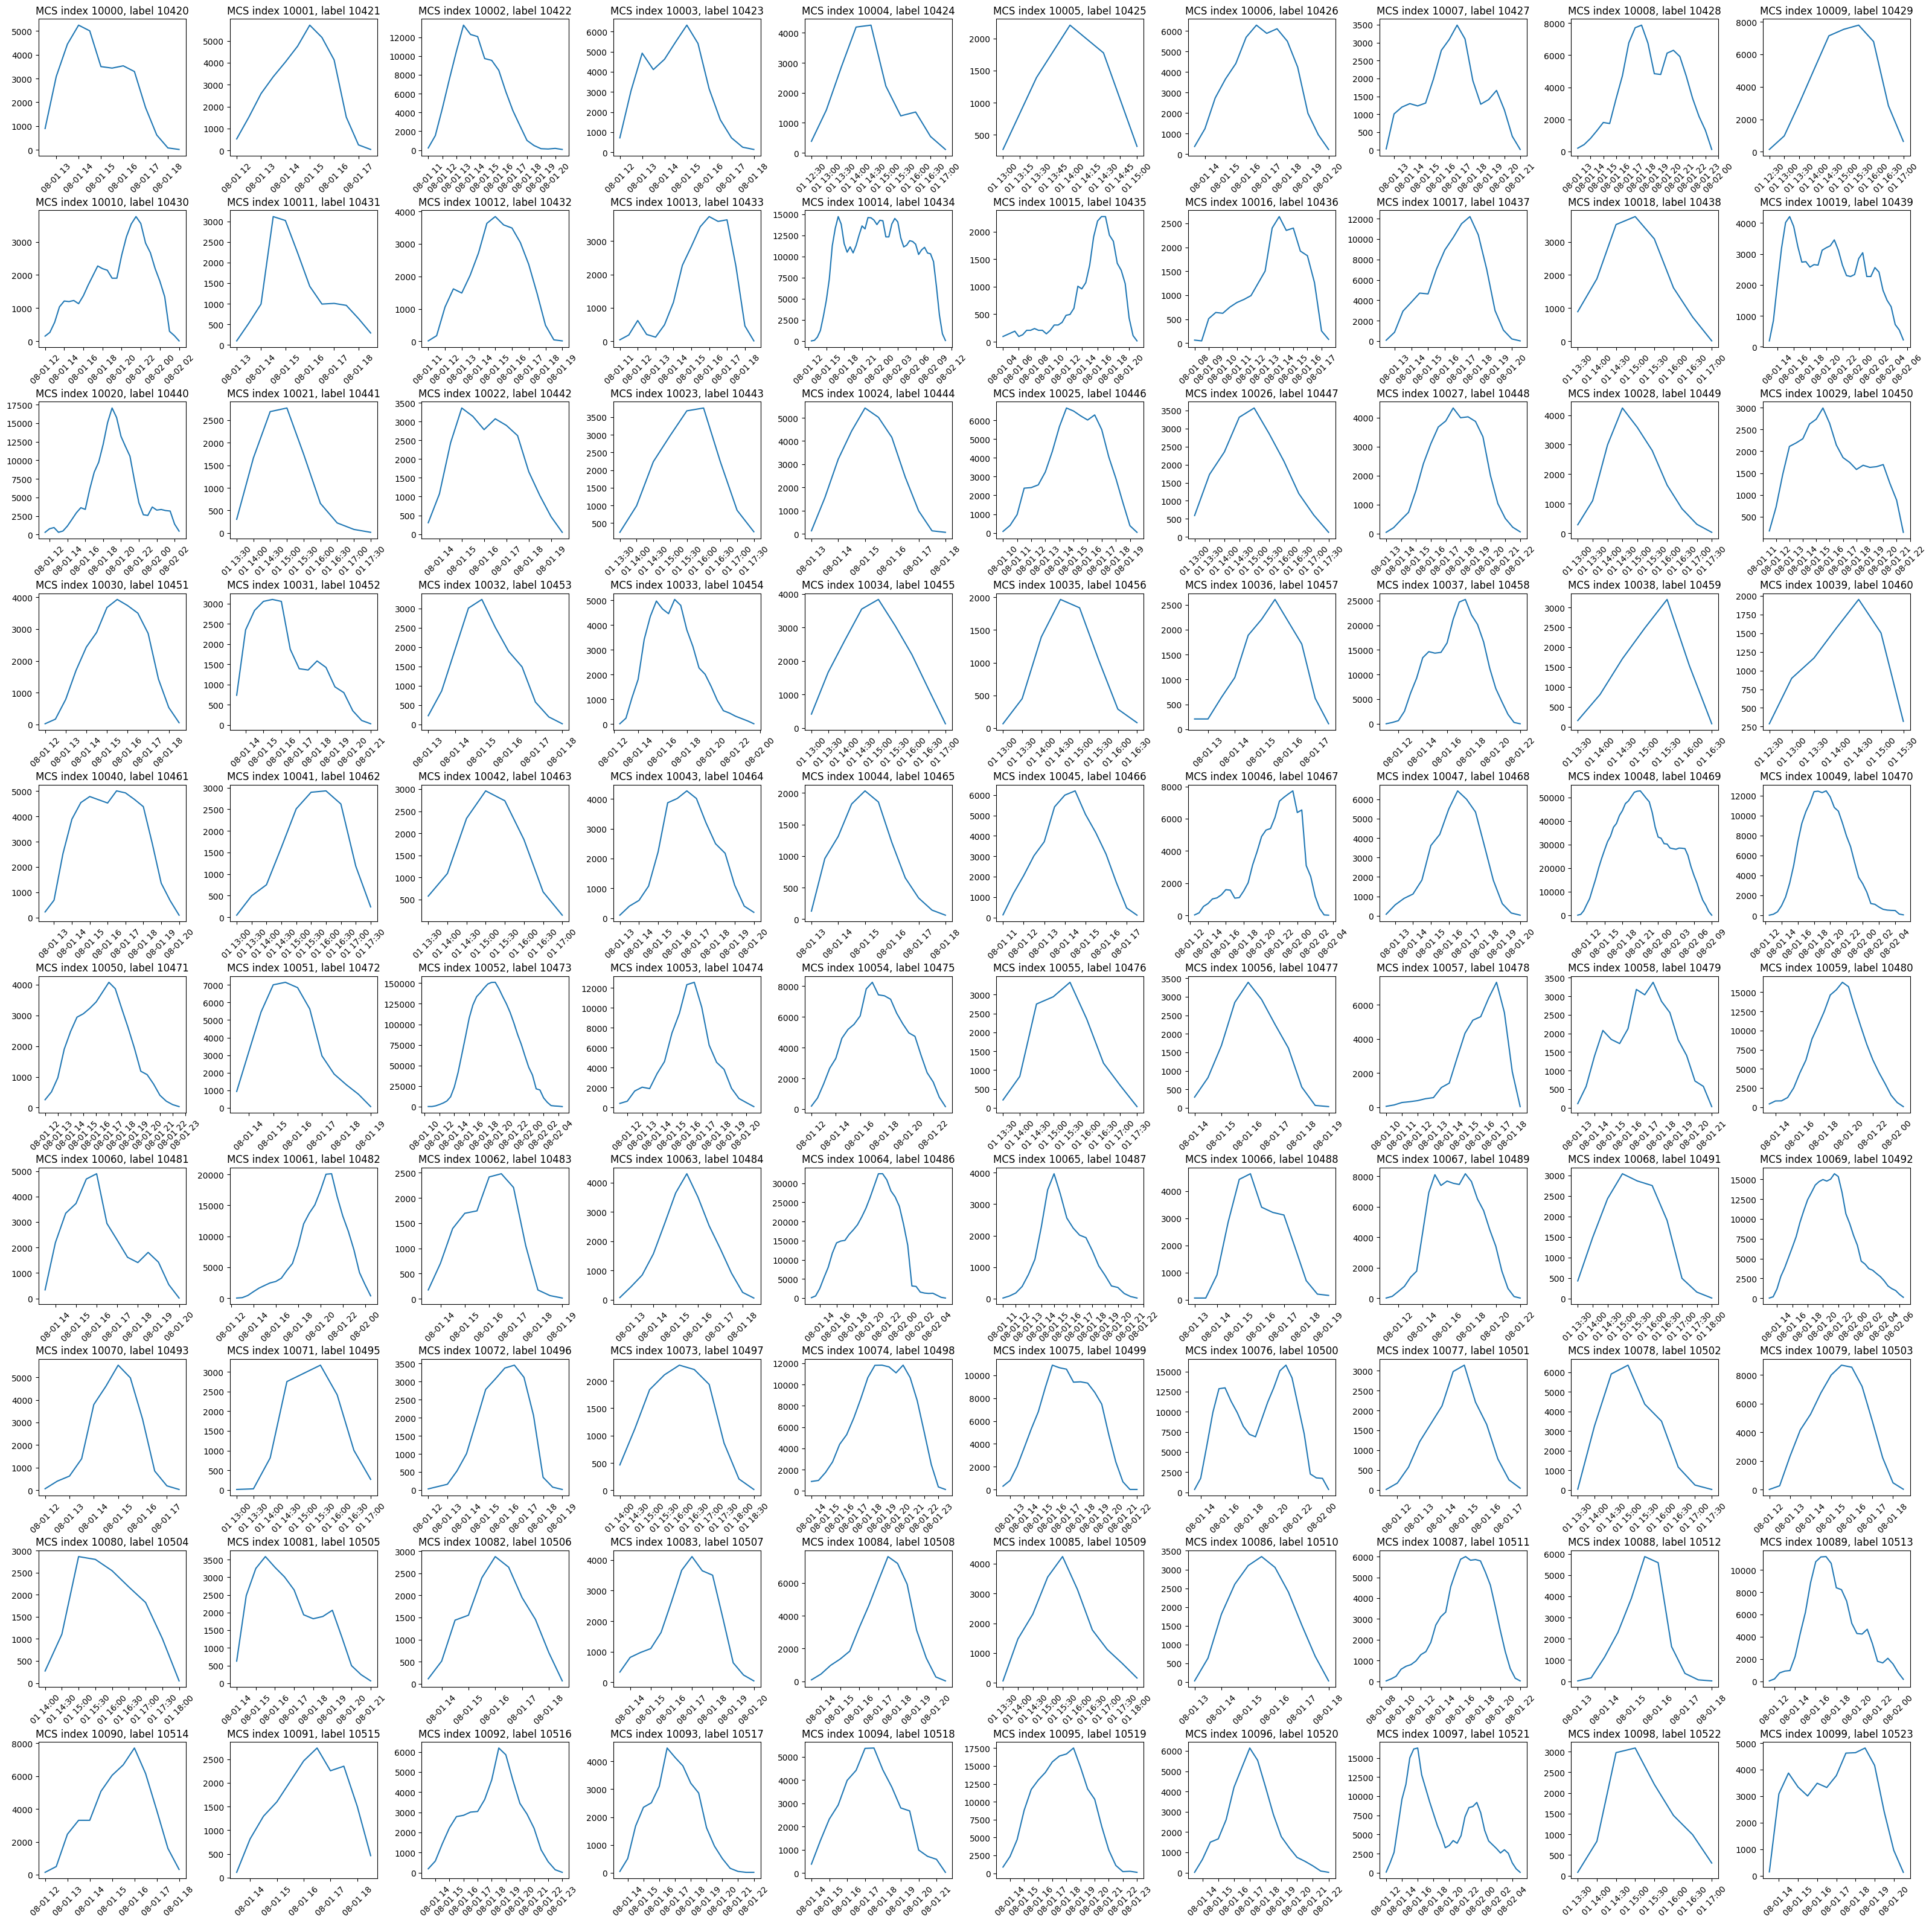

In [83]:
Ni = 10
Nj = 10
Ntot = Ni*Nj
i_MCS_0 = 10000

fig,axs = plt.subplots(nrows=Ni,ncols=Nj,figsize=(40,40))

for i in range(Ni):
    for j in range(Nj):
        
        ax = axs[i,j]
        
        i_MCS = i*Nj + j + i_MCS_0
        # print('MCS index %s'%i_MCS)
        label = toocan[i_MCS].label
        
        # show lifecycle
        showLifeCycle(ax,i_MCS)
        # MCS number as title
        ax.set_title('MCS index %d, label %d'%(i_MCS,label))
        
        # Rotate the x-axis tick labels by 45 degrees
        ax.tick_params(axis='x', rotation=45)
        
# Adjust the vertical spacing between subplots
plt.subplots_adjust(hspace=0.4)
# Adjust the horizontal spacing between subplots
plt.subplots_adjust(wspace=0.3)

# save
plt.savefig(os.path.join(DIR_FIG,'lifecycle','area_of_MCS_%d_to_%d.pdf'%(i_MCS_0,i_MCS_0+Ntot-1)),bbox_inches='tight')
plt.show()

In [84]:
np.greater(np.array([1,np.nan,3]),2)

array([False, False,  True])